In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from xgboost import XGBClassifier

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import plot_confusion_matrix

In [5]:
plt.rcParams['figure.figsize'] = (10,10)

## The modifications of the data set (data =modeling_numeric.csv)
​
  ### We have to drop some unnecessary columns that we saw in the feature_importances_.
    * "R_fighter","B_fighter","Referee","date","location","R_draw","B_draw","no_of_rounds","R_wins","B_wins",
    * "R_losses","B_losses","B_total_title_bouts","R_total_title_bouts","R_total_rounds_fought","B_total_rounds_fought",           * "R_total_time_fought(seconds)","B_total_time_fought(seconds)","R_longest_win_streak","B_longest_win_streak",
    * "R_current_lose_streak","B_current_lose_streak",'R_win_by_Decision_Majority','R_win_by_Decision_Split',
    * 'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO',"R_win_by_Submission','R_win_by_TKO_Doctor_Stoppage',
    * "B_current_win_streak",'B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous',
    * 'B_win_by_KO/TKO', 'B_win_by_Submission','B_win_by_TKO_Doctor_Stoppage',"title_bout",
    * "R_current_win_streak",'R_Stance','B_Stance'
    
 ### We applied an OrdinalEncoder to the weight_class
 ### We dropped from winner the Draw results because did not help us for the prediction and after we chaged to binary  1=Red Winner , 0= Blue Winner
 ### In this data set all the Null values were replaced and deleted.
 ### We created two new columns (weight_diff_red-blue and height_diff_red-blue)

In [6]:
data=pd.read_csv("data/modeling_numeric.csv",index_col=None)

In [7]:
data.head()

,Winner,title_bout,weight_class,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,...,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,weight_diff_red-blue,height_diff_red-blue
0,1,1,4,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,...,0.050000,110.500000,43.300000,162.56,162.56,135.0,31.0,32.0,0.0,-5.08
1,1,1,3,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,...,0.147143,158.142857,82.285714,165.10,167.64,125.0,32.0,31.0,0.0,-2.54
2,1,0,8,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,...,0.131333,102.133333,38.600000,180.34,193.04,155.0,36.0,35.0,0.0,-5.08
3,0,0,4,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,...,0.000000,115.125000,48.875000,162.56,172.72,135.0,26.0,29.0,0.0,-7.62
4,0,0,12,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,0.000000,...,0.000000,60.500000,27.750000,187.96,190.50,264.0,32.0,26.0,14.0,7.62


In [8]:
data.drop('title_bout',axis=1,inplace=True)

In [23]:
data.shape

(3307, 109)

In [9]:
model = XGBClassifier()

In [10]:
X = data.drop(['Winner'], axis=1)
y = data['Winner']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [11]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
model.score(X_train, y_train)

1.0

In [13]:
model.score(X_test, y_test)

0.6555891238670695

In [14]:
model.feature_importances_

array([0.00672946, 0.01103173, 0.00845295, 0.01016635, 0.00630724,
       0.01069614, 0.0117727 , 0.00717675, 0.00763253, 0.01131273,
       0.00889744, 0.00634798, 0.00747247, 0.00492427, 0.01049399,
       0.00835611, 0.00981937, 0.01509426, 0.00681552, 0.00613443,
       0.01232072, 0.00823317, 0.00685921, 0.01065589, 0.01016969,
       0.00924889, 0.01097713, 0.00864087, 0.00783721, 0.01147285,
       0.01176905, 0.00713432, 0.01037623, 0.00891343, 0.01016674,
       0.00881184, 0.00798717, 0.00689453, 0.00901847, 0.00841305,
       0.00980452, 0.00488428, 0.00820375, 0.00660201, 0.00892831,
       0.00966611, 0.01248576, 0.01176027, 0.01158344, 0.01038323,
       0.00915227, 0.01087775, 0.01099092, 0.00893019, 0.00719674,
       0.0139864 , 0.00617568, 0.01046197, 0.00967539, 0.01231206,
       0.00594125, 0.00860112, 0.00579585, 0.01010761, 0.00647257,
       0.00755573, 0.01232685, 0.01200435, 0.01018175, 0.00679771,
       0.00891655, 0.00683494, 0.00978555, 0.0106841 , 0.00760

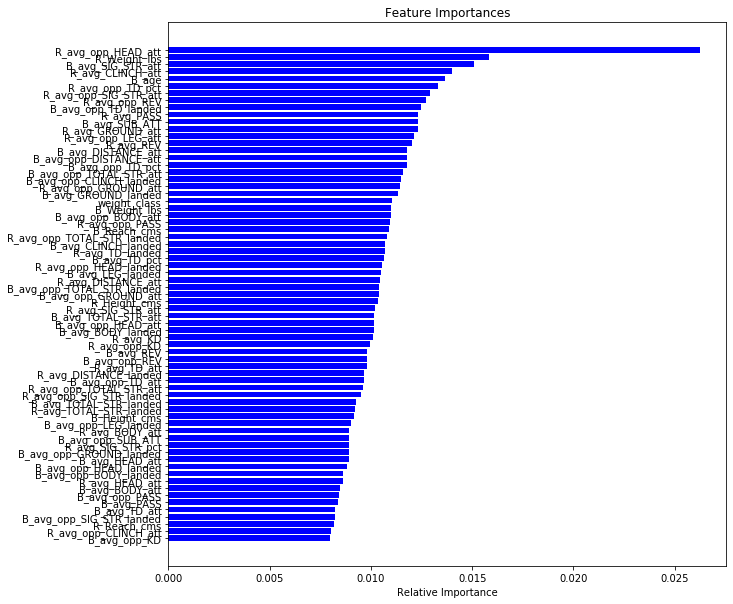

In [93]:
features = data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-69:]  # top 30 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

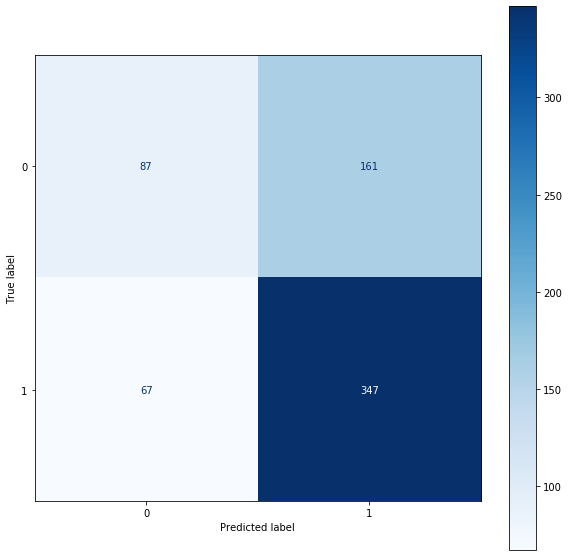

In [15]:
predictions = model.predict(X_test) #1=Red, 0=Blue

# Generate confusion matrix
matrix = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

## We will try to improve the model by changing some information into the dataset, we will take the mean of every single avg column for Red and Blue fighter, create other ones with this information, and replaced the old one to see if that could improve our results.

## The modifications of the data set (data =data_modeling.csv). This is the original data set

  ### We have to drop the categorical columns.
    * "R_fighter","B_fighter", "Referee", "date","location"
        
### We applied an OrdinalEncoder to the weight_class
### We applied and label_encoder to the B_Stance and R_Stance
### We dropped from winner the Draw results because did not help us for the prediction and after we chaged to binary  1=Red Winner , 0= Blue Winner
### In this data set all the Null values were replaced and deleted.

In [159]:
data1=pd.read_csv("data/data_modeling.csv",index_col=None)

In [160]:
data1.shape

(3360, 145)

In [161]:
R_col = [s for s in data1.columns if "R_avg_" in s]
len(R_col)

48

In [162]:
R_avg=[]
for i in range(len(R_col)):
    x=data1.groupby("R_fighter")[R_col[i]].mean()
    R_avg.append(x)
    

In [163]:
B_col = [s for s in data1.columns if "B_avg_" in s]
len(B_col)

48

In [171]:
B_avg=[]
for i in range(len(B_col)):
    x=data1.groupby("B_fighter")[B_col[i]].mean()
    B_avg.append(x)

In [172]:
B_fighter_avg = pd.DataFrame(B_avg).T
B_fighter_avg.reset_index(inplace=True)
B_fighter_avg.head()

,B_fighter,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,...,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed
0,Aaron Riley,16.690476,14.040476,30.440476,17.669048,79.547619,27.788095,3.454762,2.485714,79.478571,...,0.000000,124.292857,49.135714,0.391357,0.000000,4.528571,2.719048,0.374405,143.954762,68.519048
1,Aaron Rosa,23.500000,21.000000,31.500000,26.000000,107.500000,40.000000,0.000000,0.000000,110.500000,...,0.000000,113.500000,53.500000,0.470000,0.000000,7.000000,1.000000,0.175000,189.500000,116.500000
2,Aaron Simpson,10.811111,7.488889,18.155556,11.755556,38.400000,11.622222,14.733333,8.377778,55.233333,...,0.122222,69.411111,29.200000,0.366000,0.466667,2.000000,0.355556,0.067889,81.188889,40.377778
3,Abdul Razak Alhassan,2.416667,1.583333,6.333333,4.833333,52.583333,21.333333,1.666667,1.250000,55.000000,...,0.000000,79.583333,29.000000,0.304167,0.000000,4.083333,2.500000,0.275000,105.333333,48.916667
4,Abel Trujillo,14.913889,12.897222,17.502778,13.900000,33.555556,9.225000,16.658333,14.172222,49.244444,...,0.000000,42.663889,18.738889,0.476639,0.969444,10.147222,5.619444,0.410694,54.388889,27.955556


In [173]:
R_fighter_avg = pd.DataFrame(R_avg).T
R_fighter_avg.reset_index(inplace=True)
R_fighter_avg.head()

,R_fighter,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,...,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed
0,Aaron Phillips,14.000000,12.000000,6.000000,3.000000,26.000000,9.000000,8.000000,6.000000,23.000000,...,1.000000,68.000000,37.000000,0.540000,1.000000,8.000000,5.000000,0.620000,129.000000,95.000000
1,Aaron Riley,13.083333,10.833333,22.958333,13.625000,62.541667,21.041667,2.500000,1.833333,61.333333,...,0.000000,106.000000,41.791667,0.390417,0.000000,3.125000,1.916667,0.270833,120.208333,55.791667
2,Aaron Simpson,9.433787,6.768481,16.586395,12.109127,32.247619,11.256406,15.888889,9.396202,47.773356,...,0.068424,52.298073,21.340420,0.361684,0.208277,1.575737,0.301304,0.060827,64.855102,33.190703
3,Abdul Razak Alhassan,1.000000,0.625000,4.500000,3.375000,30.875000,12.625000,2.500000,1.875000,35.250000,...,0.000000,38.500000,13.625000,0.250000,0.000000,1.625000,0.875000,0.145000,47.000000,19.875000
4,Abel Trujillo,9.370370,8.052910,12.714286,9.343915,42.253968,12.084656,11.576720,9.550265,54.571429,...,0.000000,49.915344,21.291005,0.463598,1.269841,8.941799,5.650794,0.534444,62.640212,31.534392


In [174]:
drop_col = [s for s in data1.columns if "_avg_" in s]
data1.drop(columns=drop_col, inplace=True)

In [176]:
data1.drop(columns=['no_of_rounds',
 'B_current_lose_streak',
 'B_current_win_streak',
 'B_draw',
 'B_longest_win_streak',
 'B_losses',
 'B_total_rounds_fought',
 'B_total_time_fought(seconds)',
 'B_total_title_bouts','B_wins','B_win_by_Decision_Majority',
 'B_win_by_Decision_Split',
 'B_win_by_Decision_Unanimous',
 'B_win_by_KO/TKO',
 'B_win_by_Submission',
 'B_win_by_TKO_Doctor_Stoppage','R_current_lose_streak',
 'R_current_win_streak',
 'R_draw',
 'R_longest_win_streak',
 'R_losses',
 'R_total_rounds_fought',
 'R_total_time_fought(seconds)',
 'R_total_title_bouts',
 'R_win_by_Decision_Majority',
 'R_win_by_Decision_Split',
 'R_win_by_Decision_Unanimous',
 'R_win_by_KO/TKO',
 'R_win_by_Submission',
 'R_win_by_TKO_Doctor_Stoppage',
 'R_wins','title_bout'], inplace=True)

In [177]:
list(data1.columns)

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'weight_class',
 'B_Stance',
 'B_Height_cms',
 'B_Reach_cms',
 'B_Weight_lbs',
 'R_Stance',
 'R_Height_cms',
 'R_Reach_cms',
 'R_Weight_lbs',
 'B_age',
 'R_age']

In [178]:
data1.shape

(3360, 17)

In [179]:
df_new=pd.merge(left=data1, right= R_fighter_avg, how= "left", left_on= "R_fighter", right_on= "R_fighter" )

In [180]:
new_data1=pd.merge(left=df_new, right= B_fighter_avg, how= "left", left_on= "B_fighter", right_on= "B_fighter")

In [181]:
new_data1.shape

(3360, 113)

In [187]:
new_data1.head()

,Winner,weight_class,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,...,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed
0,Red,Bantamweight,Orthodox,167.64,170.18,135.0,Orthodox,162.56,162.56,135.0,...,0.000000,83.200000,28.279167,0.287750,0.000000,1.229167,0.391667,0.097917,84.033333,29.112500
1,Red,Women's Flyweight,Orthodox,167.64,167.64,125.0,Southpaw,165.10,167.64,125.0,...,0.000000,137.650926,56.048611,0.408796,0.558796,1.888426,0.815278,0.213069,173.770833,90.565278
2,Red,Lightweight,Orthodox,185.42,185.42,155.0,Orthodox,180.34,193.04,155.0,...,0.027213,86.536887,40.457281,0.433022,0.231550,2.153169,0.243620,0.046519,91.914991,45.104552
3,Blue,Bantamweight,Switch,170.18,170.18,135.0,Orthodox,162.56,172.72,135.0,...,0.000000,112.000000,32.861111,0.324722,0.000000,4.111111,0.527778,0.071389,114.583333,35.083333
4,Blue,Heavyweight,Southpaw,180.34,185.42,250.0,Southpaw,187.96,190.50,264.0,...,0.000000,205.500000,90.000000,0.430000,0.000000,0.500000,0.000000,0.000000,205.500000,90.000000


In [186]:
new_data1.drop(columns=[ "R_fighter","B_fighter", "Referee", "date","location"], inplace=True)

In [193]:
from sklearn import preprocessing

In [194]:
def label_encoder(df,col):
    le = preprocessing.LabelEncoder()
    transformed = le.fit_transform(df[col])
    df[col] = transformed

In [195]:
label_encoder(new_data1,"R_Stance")

In [196]:
label_encoder(new_data1,"B_Stance")

In [197]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["Strawweight","Women's Strawweight", "Flyweight","Women's Flyweight", "Bantamweight","Women's Bantamweight","Featherweight","Women's Featherweight",
                                      "Lightweight","Welterweight","Middleweight","Light Heavyweight","Heavyweight","Open Weight","Catch Weight"]],dtype=np.int8)
new_data1['weight_class'] = encoder.fit_transform(new_data1['weight_class'].values.reshape(-1, 1))

In [199]:
new_data1.drop(new_data1[new_data1.Winner == "Draw"].index, inplace=True)

In [201]:
new_data1["Winner"]= [0 if value == "Blue" else 1 for value in new_data1["Winner"]] # 1=Red, 0=Blue

In [202]:
new_data1.head()

,Winner,weight_class,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,...,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed
0,1,4,1,167.64,170.18,135.0,1,162.56,162.56,135.0,...,0.000000,83.200000,28.279167,0.287750,0.000000,1.229167,0.391667,0.097917,84.033333,29.112500
1,1,3,1,167.64,167.64,125.0,2,165.10,167.64,125.0,...,0.000000,137.650926,56.048611,0.408796,0.558796,1.888426,0.815278,0.213069,173.770833,90.565278
2,1,8,1,185.42,185.42,155.0,1,180.34,193.04,155.0,...,0.027213,86.536887,40.457281,0.433022,0.231550,2.153169,0.243620,0.046519,91.914991,45.104552
3,0,4,3,170.18,170.18,135.0,1,162.56,172.72,135.0,...,0.000000,112.000000,32.861111,0.324722,0.000000,4.111111,0.527778,0.071389,114.583333,35.083333
4,0,12,2,180.34,185.42,250.0,2,187.96,190.50,264.0,...,0.000000,205.500000,90.000000,0.430000,0.000000,0.500000,0.000000,0.000000,205.500000,90.000000


In [203]:
X1 = new_data1.drop(['Winner'], axis=1)
y1 = new_data1['Winner']

X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.20, random_state = 0)

In [204]:
model.fit(X_train1,y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [206]:
model.score(X_train1, y_train1)

1.0

In [205]:
model.score(X_test1, y_test1)

0.6737160120845922

In [207]:
model.feature_importances_

array([0.01337702, 0.00407581, 0.00857816, 0.00678012, 0.02394684,
       0.00586375, 0.00865767, 0.00672275, 0.00474499, 0.01100417,
       0.01301218, 0.00360176, 0.0068603 , 0.00761052, 0.00973543,
       0.00620481, 0.00655222, 0.0105258 , 0.01189466, 0.00531263,
       0.01123013, 0.01143034, 0.0075411 , 0.01016883, 0.01296467,
       0.01362904, 0.00760659, 0.00961197, 0.00596464, 0.01246181,
       0.00936173, 0.00558361, 0.00786468, 0.00775732, 0.0095026 ,
       0.00878697, 0.00981068, 0.01068774, 0.00784318, 0.01290666,
       0.00591914, 0.00448241, 0.00850798, 0.01191729, 0.00779108,
       0.0073793 , 0.00486902, 0.00871802, 0.00686046, 0.01227596,
       0.00791513, 0.01017699, 0.01145611, 0.00897485, 0.00719971,
       0.00824064, 0.00955939, 0.01009637, 0.01037738, 0.00832753,
       0.00600826, 0.00770197, 0.00600439, 0.0093801 , 0.03685402,
       0.00628987, 0.00839027, 0.01549397, 0.00908253, 0.0101396 ,
       0.00708567, 0.01182471, 0.01225954, 0.00782912, 0.01228

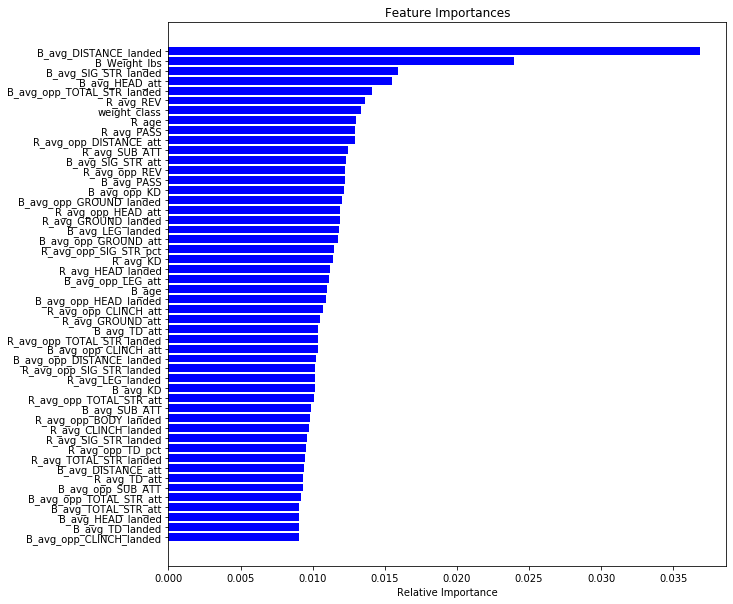

In [211]:
features = X1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-50:] 
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

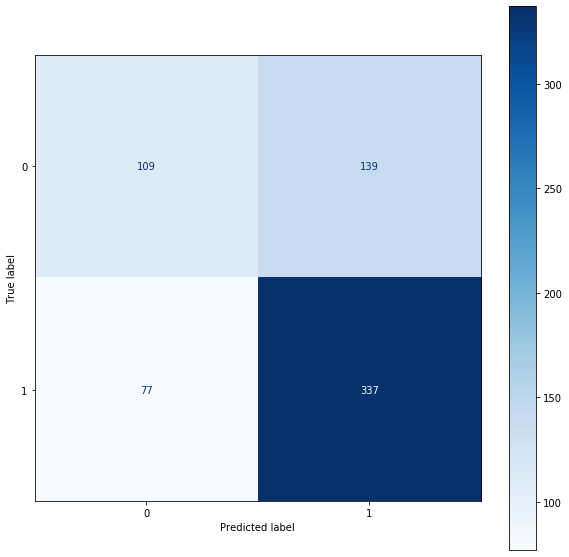

In [210]:
predictions = model.predict(X_test1) #1=Red, 0=Blue

# Generate confusion matrix
matrix = plot_confusion_matrix(model, X_test1, y_test1,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [231]:
from sklearn.metrics import classification_report, confusion_matrix

In [217]:
y_pred = model.predict(X_test1)


In [218]:
print(classification_report(y_test1, y_pred)) #1=Red, 0=Blue

              precision    recall  f1-score   support

           0       0.59      0.44      0.50       248
           1       0.71      0.81      0.76       414

    accuracy                           0.67       662
   macro avg       0.65      0.63      0.63       662
weighted avg       0.66      0.67      0.66       662



## Our final conclusion after changing the data from the data set. The model improves a little bit in comparison with the original XGboost from 0.65 to 0.67 but still difficult to predict a winner from a combat

## We will try reducing the number of features for Overfitting reduction purpose

In [219]:
from sklearn.feature_selection import VarianceThreshold

In [220]:
thresholder = VarianceThreshold(threshold= 0.5)

In [221]:
X_high_variance= thresholder.fit_transform(X1)

In [222]:
X_high_variance.shape

(3307, 85)

In [223]:
y2 = new_data1['Winner']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X_high_variance,y2,test_size = 0.20, random_state = 0)

In [224]:
model.fit(X_train2,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [225]:
model.score(X_train2, y_train2)

0.9996219281663516

In [226]:
model.score(X_test2, y_test2)

0.6540785498489426

## It did not work that well that we were expecting.

## We will try different models to see how are the results

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
rf = RandomForestClassifier(max_depth=15)
rf.fit(X_train1, y_train1)
rf.score(X_test1, y_test1)

0.6601208459214502

In [235]:
y_pred_rf = rf.predict(X_test1)
confusion_matrix(y_test1, y_pred_rf)

array([[ 71, 177],
       [ 48, 366]], dtype=int64)

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
logmodel= LogisticRegression(max_iter = 10000)
logmodel.fit(X1, y1)
logmodel.score(X1,y1)

0.6876322951315391

In [238]:
logmodel = LogisticRegression(max_iter = 10000)
logmodel.fit(X_train1, y_train1)
logmodel.score(X_test1,y_test1)

0.6555891238670695

# The final conclusion from this notebook is that the best results that we got trying all the models and changing the data set in different ways, is 0.67 with an XGboost